"This study will consider vino verde, a unique product from the Minho (north- west) region of Portugal. The data were collected from May/2004 to February/2007 using only protected designation of origin samples that were tested at the official certification en- tity (CVRVV).


Wine certification is generally assessed by physicochemical and sensory tests [10]. Physicochemical laboratory tests routinely used to characterize wine in- clude determination of density, alcohol or pH values, while sensory tests rely mainly on human experts. It should be stressed that taste is the least un- derstood of the human senses [25], thus wine classification is a difficult task. Moreover, the relationships between the physicochemical and sensory analysis are complex and still not fully understood " 
Cortez et al, 2009

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns

# Missing values and duplicates

In [2]:
#loading dataset
wine=pd.read_csv('winequality-red.csv')

In [3]:
#checking for null values
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
#no null values. Let's check for duplicates

sum(wine.duplicated())

240

Since there are 240 duplicatred entries we will remove them as they may cause modle overfitting. Before I delete them I will quickly check on my 'quality' column distribution because that is my target column

<IPython.core.display.Javascript object>


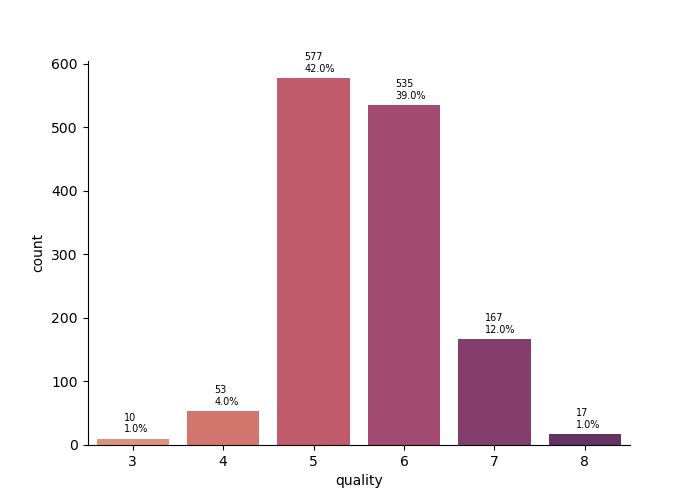

In [35]:
plt.figure(figsize=(7,5))
ax=sns.countplot(data=wine,x='quality',palette='flare')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}\n{(p.get_height()/len(wine)*100).round(0)}%', (p.get_x()+0.3, p.get_height()+10), color='black', size=7)

    
ax.spines['top'].set_color('white') #setting right and top edge to invisible
ax.spines['right'].set_color('white')


plt.show()


Let's check on quality category of duplicates

In [6]:
wine[wine.duplicated()]['quality'].value_counts()

5    104
6    103
7     32
8      1
Name: quality, dtype: int64

In [7]:
#Removing those duplicates will decrease the number ofdata within the categories witth the majority data
#so it is actually good

In [8]:
wine.drop_duplicates(inplace=True)

In [9]:
#let's check on our dataframe again
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [10]:
#all looks good and now let's look into features
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


1. fixed acidity- most acids involved with wine or fixed or nonvolatile (do not evaporate readily)
2. volatile acidity- the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
3. citric acid-found in small quantities, citric acid can add 'freshness' and flavor to wines
4. residual sugar - the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet
5. chlorides-the amount of salt in the wine
6. free sulfur dioxide-the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine
7. total sulfur dioxide-amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine
8. density- the density of water is close to that of water depending on the percent alcohol and sugar content
9. pH- describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale
10. sulphates- a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant



Note: Features will have to be scaled for certain models

<IPython.core.display.Javascript object>


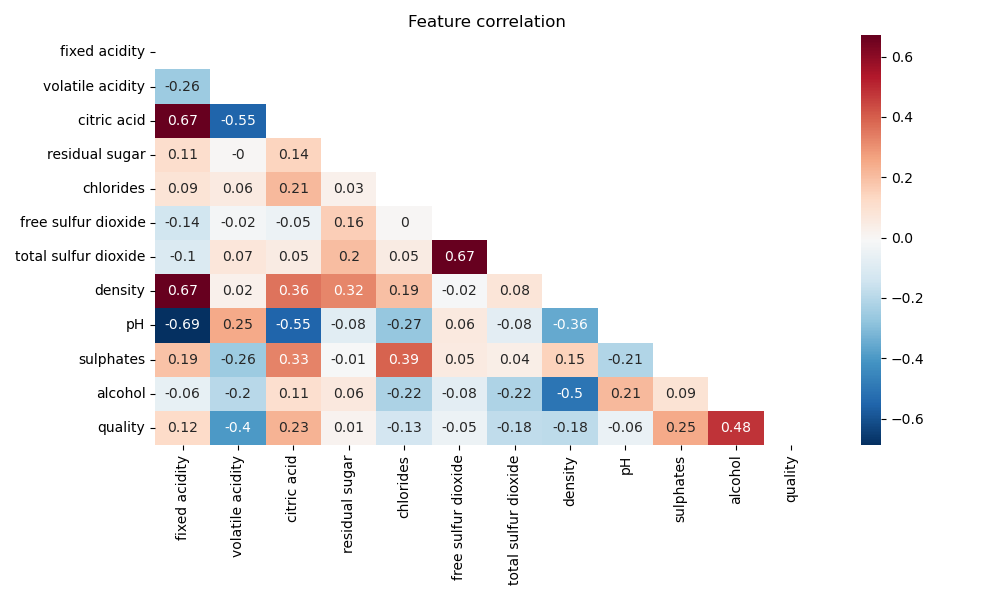

In [11]:
plt.figure(figsize=(10,6))
plt.title('Feature correlation')
shape=np.triu(wine.corr())
sns.heatmap(wine.corr(),annot=wine.corr().round(2),mask=shape,cmap='RdBu_r')
plt.tight_layout()
plt.show()

From above correaltion heatmap I can see that there is a relatively high correlation between the fixed acidity and volatile acidity, fixed acidit and density and fixed acidity and Ph value. Citric acdi and density also have realtively high correlation woth some other features. This things should one have in mind when doing feature selection. For example, people sense fixed acids with their tongue, and volatile with their nose. But, the volatile acidity can affect the quality of wine a lot and therefore I would rather keep the volatile acidity and drop the fixed acidity.That would also resolve a problem of high correlation between the fixed acidity and other above mentioned features. 

Let's cehck the features distribution.

# Visualizing features distribution

<IPython.core.display.Javascript object>


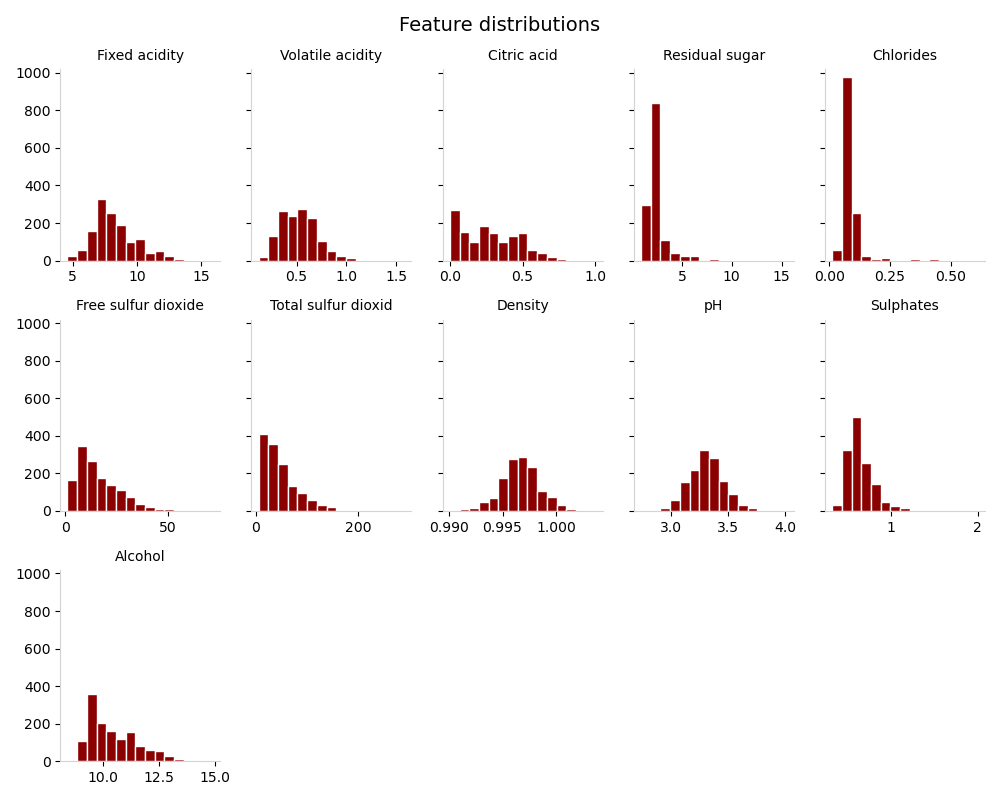

In [16]:
fig,((ax1,ax2,ax3,ax4,ax5),(ax6,ax7,ax8,ax9,ax10),(ax11,ax12,ax13,ax14,ax15))=plt.subplots(3,5,sharex=False,sharey=True,figsize=(10,8))
plt.suptitle('Feature distributions',size=14)
axs=[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15]
columns=wine.columns

for n in range(0,11):
    axs[n].hist(wine[columns[n]],color='darkred',bins=15,edgecolor="white")
    axs[n].spines['bottom'].set_color('lightgrey')
    axs[n].spines['top'].set_color('white')
    axs[n].spines['left'].set_color('lightgrey')
    axs[n].spines['right'].set_color('white')
    
ax1.set_title('Fixed acidity',size=10)
ax2.set_title('Volatile acidity',size=10)
ax3.set_title('Citric acid',size=10)
ax4.set_title("Residual sugar",size=10)
ax5.set_title('Chlorides',size=10)
ax6.set_title('Free sulfur dioxide',size=10)
ax7.set_title('Total sulfur dioxid',size=10)
ax8.set_title('Density',size=10)
ax9.set_title('pH',size=10)
ax10.set_title('Sulphates',size=10)
ax11.set_title('Alcohol',size=10)



for n in range(11,15):
    axs[n].spines['bottom'].set_color('white')
    axs[n].spines['top'].set_color('white')
    axs[n].spines['left'].set_color('white')
    axs[n].spines['right'].set_color('white')
    axs[n].xaxis.set_visible(False)
    axs[n].yaxis.set_visible(False)

plt.tight_layout()
plt.show()

We can see that fixed  and volatile acidity have similar distributions. Same thing with free and total sulfur.

<IPython.core.display.Javascript object>


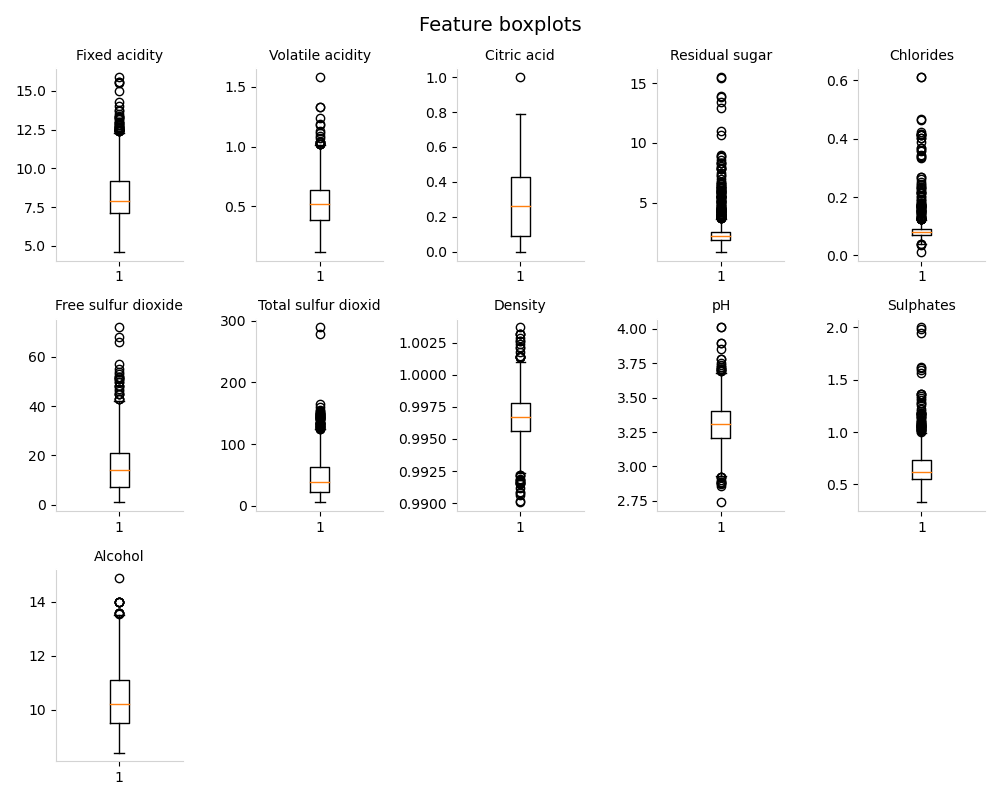

In [34]:
#use box plots to check for possibble o

fig,((ax1,ax2,ax3,ax4,ax5),(ax6,ax7,ax8,ax9,ax10),(ax11,ax12,ax13,ax14,ax15))=plt.subplots(3,5,sharex=False,sharey=False,figsize=(10,8))
plt.suptitle('Feature boxplots',size=14)
axs=[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15]
columns=wine.columns

for n in range(0,11):
    axs[n].boxplot(wine[columns[n]],manage_ticks=True)
    axs[n].spines['bottom'].set_color('lightgrey')
    axs[n].spines['top'].set_color('white')
    axs[n].spines['left'].set_color('lightgrey')
    axs[n].spines['right'].set_color('white')
    
ax1.set_title('Fixed acidity',size=10)
ax2.set_title('Volatile acidity',size=10)
ax3.set_title('Citric acid',size=10)
ax4.set_title("Residual sugar",size=10)
ax5.set_title('Chlorides',size=10)
ax6.set_title('Free sulfur dioxide',size=10)
ax7.set_title('Total sulfur dioxid',size=10)
ax8.set_title('Density',size=10)
ax9.set_title('pH',size=10)
ax10.set_title('Sulphates',size=10)
ax11.set_title('Alcohol',size=10)



for n in range(11,15):
    axs[n].spines['bottom'].set_color('white')
    axs[n].spines['top'].set_color('white')
    axs[n].spines['left'].set_color('white')
    axs[n].spines['right'].set_color('white')
    axs[n].xaxis.set_visible(False)
    axs[n].yaxis.set_visible(False)

plt.tight_layout()
plt.show()

In [21]:
#checking for outliers using IQR

def outlier(column):
    s=0
    for x in wine[column]:
        iqr=wine[column].quantile(0.75)-wine[column].quantile(0.25)
        if (x > wine[column].quantile(0.75)+ 3*iqr ) | (x < wine[column].quantile(0.25)- 3*iqr ):
            s+=1
    print(f'Column {column} has {s} outliers')

In [22]:
for c in wine.columns:
    outlier(c)
    

Column fixed acidity has 4 outliers
Column volatile acidity has 1 outliers
Column citric acid has 0 outliers
Column residual sugar has 70 outliers
Column chlorides has 60 outliers
Column free sulfur dioxide has 3 outliers
Column total sulfur dioxide has 2 outliers
Column density has 0 outliers
Column pH has 2 outliers
Column sulphates has 15 outliers
Column alcohol has 0 outliers
Column quality has 0 outliers


# Discusssion and approach to outliers

From box-plots above one could conclude that features have significant number of outliers. But if we think of the data we have, they don't have to be necessarily outliers.
Since wine making is a process it could be that those wines were not produced up to standards, or that the grape variety was not of good quality, or that the year was not very good year for that grape variety etc... 
If we research a bit more those aparent outlier values could actually be valid.

For example :
" For wines containing more than 35 g/L of sugars, the total sulfur dioxide content can be up to 300 mg/L"
"Typically, the pH level of a wine ranges from 3 to 4"


So I will try to apply LocalOutlierFactor. TYhje local outlier actually sounds like a much more appropriate solution opver here. 

The local outlier factor uses distance to neighbours to calculate density.  As it's stated in sklearn,by  comparing the local density of a sample to the local densities of its neighbors, one can identify samples that have a substantially lower density than their neighbors. Which menas we actually asses how isolated is the sample and based on that we potentially reject is as an outlier. 

Based on the definition of this approach I see some "distanced" samples (scale for distance is important to observe) in volatile acidity, residual sugars, chlorides,total sulphor dioxide, pH, sulphates and alcochol. 

In [26]:
from sklearn.neighbors import LocalOutlierFactor
X = wine.iloc[:, 0:11].values
y = wine.iloc[:, -1].values
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X)
# select all rows that are not outliers
mask = yhat != -1
X_out,y_out = X[mask, :], y[mask]
# summarize the shape of the updated training dataset
print(X.shape,y.shape)
print(X_out.shape, y_out.shape)
# fit the model

(1359, 11) (1359,)
(1335, 11) (1335,)


24 points were dropped which is less than 2% of the original data.  Let's now visualize our data again. 

<IPython.core.display.Javascript object>


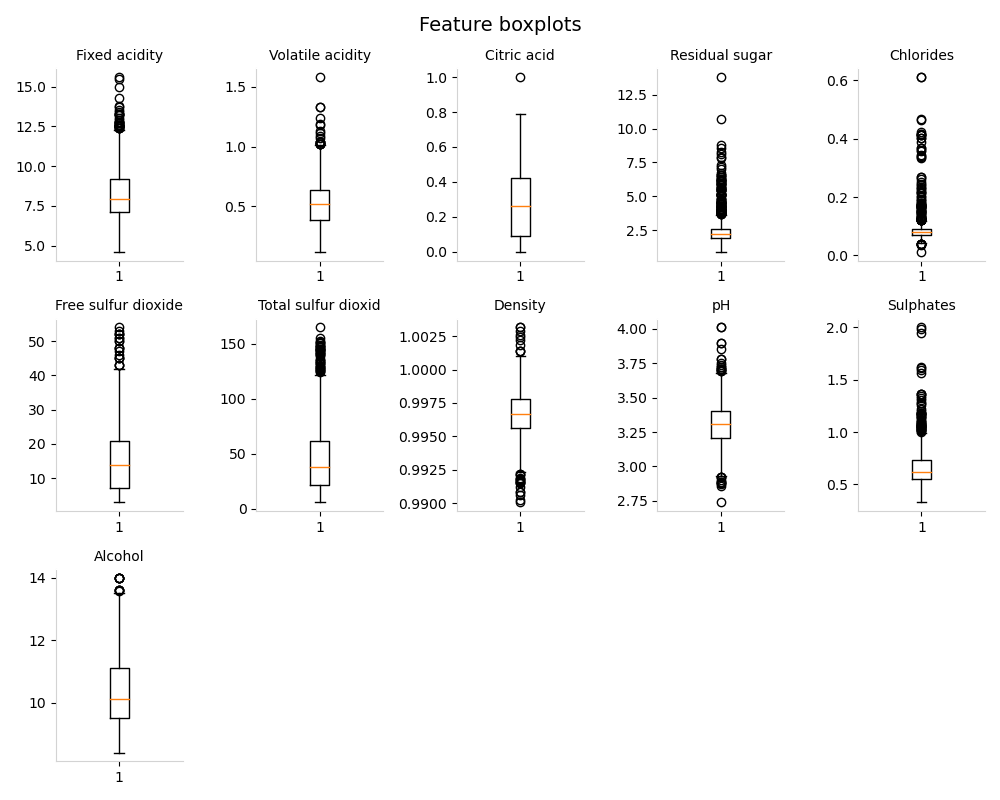

In [27]:
#use box plots to check for possibble o

fig,((ax1,ax2,ax3,ax4,ax5),(ax6,ax7,ax8,ax9,ax10),(ax11,ax12,ax13,ax14,ax15))=plt.subplots(3,5,sharex=False,sharey=False,figsize=(10,8))
plt.suptitle('Feature boxplots',size=14)
axs=[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15]


for n in range(0,11):
    axs[n].boxplot(X_out[:,n],manage_ticks=True)
    axs[n].spines['bottom'].set_color('lightgrey')
    axs[n].spines['top'].set_color('white')
    axs[n].spines['left'].set_color('lightgrey')
    axs[n].spines['right'].set_color('white')
    
ax1.set_title('Fixed acidity',size=10)
ax2.set_title('Volatile acidity',size=10)
ax3.set_title('Citric acid',size=10)
ax4.set_title("Residual sugar",size=10)
ax5.set_title('Chlorides',size=10)
ax6.set_title('Free sulfur dioxide',size=10)
ax7.set_title('Total sulfur dioxid',size=10)
ax8.set_title('Density',size=10)
ax9.set_title('pH',size=10)
ax10.set_title('Sulphates',size=10)
ax11.set_title('Alcohol',size=10)



for n in range(11,15):
    axs[n].spines['bottom'].set_color('white')
    axs[n].spines['top'].set_color('white')
    axs[n].spines['left'].set_color('white')
    axs[n].spines['right'].set_color('white')
    axs[n].xaxis.set_visible(False)
    axs[n].yaxis.set_visible(False)

plt.tight_layout()
plt.show()

In [33]:
wine['alcohol'].max()

14.9

Interestingly,the IQR approach to outliers did not detect outlier in "alcochol" feature but the LocalOutlierFactor approach did. And if we look the value removed is value of around 15% alcochol and that is probably right decision. Vino verdhe has usually less than 11.5% of alcochol , so value  around 15% does seem a bit too much. 

Also, as I suspected  some samples with high volatile acidity, residual sugars, chlorides,total sulphor dioxide, pH, sulphates were removed. 
